In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

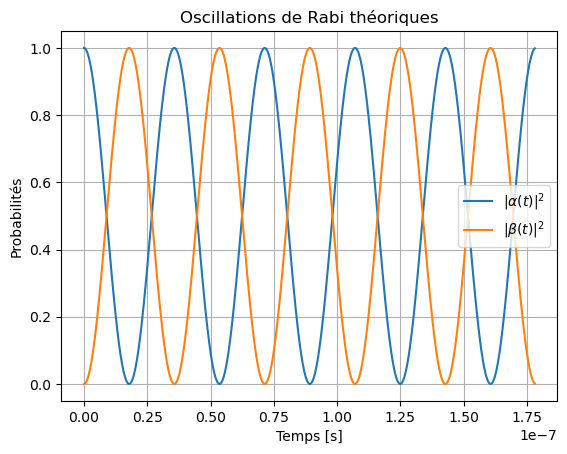

In [8]:
#fichier oscillations_parfait.csv relatif aux oscillations de Rabi théoriques non bruitées pour un qubit seul
#extraction temps, probabilités alpha et beta
t = np.loadtxt("simulation_dynamique.csv", delimiter=" ", skiprows=1,usecols=0)
p_alpha = np.loadtxt("simulation_dynamique.csv", delimiter=" ", skiprows=1,usecols=3)
p_beta = np.loadtxt("simulation_dynamique.csv", delimiter=" ", skiprows=1,usecols=4)

#Affichage des oscillations de Rabi théoriques
plt.plot(t,p_alpha,label=r'$|\alpha(t)|^2$')
plt.plot(t,p_beta,label=r'$|\beta(t)|^2$')
plt.xlabel("Temps [s]")
plt.ylabel("Probabilités")
plt.title("Oscillations de Rabi théoriques")
plt.grid()
plt.legend()
plt.show()

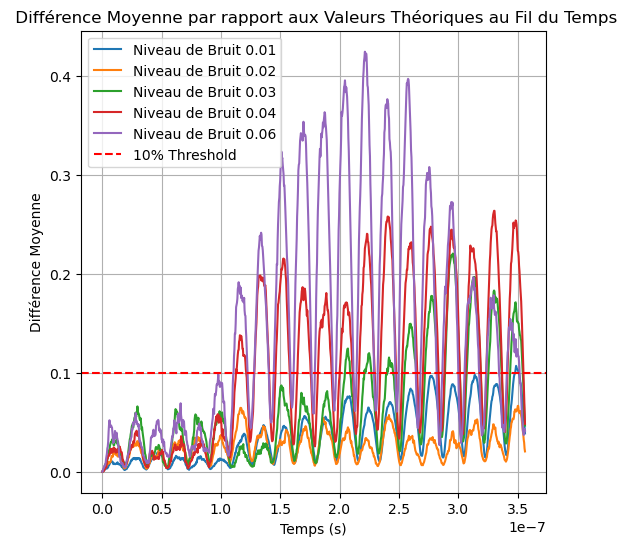

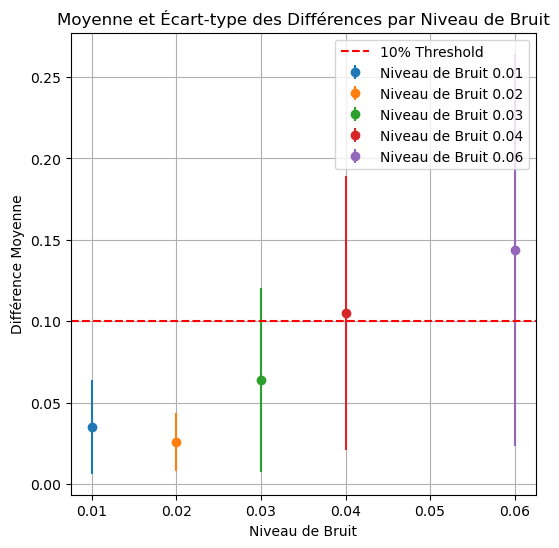

In [9]:
# Charger les données depuis le fichier CSV
data_oscillating_with_noise = np.loadtxt('simulation_niveaux_bruit_multiple.csv', delimiter=',', skiprows=1)
data_dynamic = np.loadtxt('dynamic_data.csv', delimiter=' ', skiprows=1)

# Extraire les colonnes pertinentes
noise_levels = np.unique(data_oscillating_with_noise[:, 0])
times = data_oscillating_with_noise[:, 1]

# Initialiser les listes pour stocker les différences
differences = []

plt.figure(figsize=(6, 6))

# Calculer les différences et tracer les résultats pour chaque niveau de bruit
for noise_level in noise_levels[:-1]:
    indices = np.where(data_oscillating_with_noise[:, 0] == noise_level)[0]
    abs_alpha_corrige = data_oscillating_with_noise[indices, 4]
    abs_beta_corrige = data_oscillating_with_noise[indices, 5]
    
    # Calculer les différences par rapport aux valeurs théoriques
    difference_alpha_corrige = np.abs(abs_alpha_corrige - data_dynamic[:len(abs_alpha_corrige), -2])
    difference_beta_corrige = np.abs(abs_beta_corrige - data_dynamic[:len(abs_beta_corrige), -1])

    # Regrouper les différences alpha et beta
    combined_differences = (difference_alpha_corrige + difference_beta_corrige) / 2
    differences.append(combined_differences)

    # Calculer l'écart moyen toutes les 10 itérations
    window_size = 10
    mean_combined_differences = np.array([np.mean(combined_differences[max(0, i-window_size+1):i+1]) for i in range(len(combined_differences))])

    # Tracer les résultats
    plt.plot(times[indices], mean_combined_differences, label=f'Niveau de Bruit {noise_level}')

    # Identifier les moments où les courbes dépassent le seuil de 10%
    threshold = 0.1
    #exceeds_threshold = mean_combined_differences > threshold
    #plt.scatter(times[indices][exceeds_threshold], mean_combined_differences[exceeds_threshold], color='red', zorder=5)

plt.axhline(y=threshold, color='r', linestyle='--', label='10% Threshold')
plt.xlabel('Temps (s)')
plt.ylabel('Différence Moyenne')
plt.title(' Différence Moyenne par rapport aux Valeurs Théoriques au Fil du Temps')
plt.legend()
plt.grid(True)
plt.show()

# Calculer et afficher les statistiques supplémentaires
plt.figure(figsize=(6, 6))

for i, noise_level in enumerate(noise_levels[:-1]):
    mean_diff = np.mean(differences[i])
    std_diff = np.std(differences[i])
    plt.errorbar(noise_level, mean_diff, yerr=std_diff, fmt='o', label=f'Niveau de Bruit {noise_level}')

plt.axhline(y=threshold, color='r', linestyle='--', label='10% Threshold')
plt.xlabel('Niveau de Bruit')
plt.ylabel('Différence Moyenne')
plt.title('Moyenne et Écart-type des Différences par Niveau de Bruit')
plt.legend()
plt.grid(True)
plt.show()

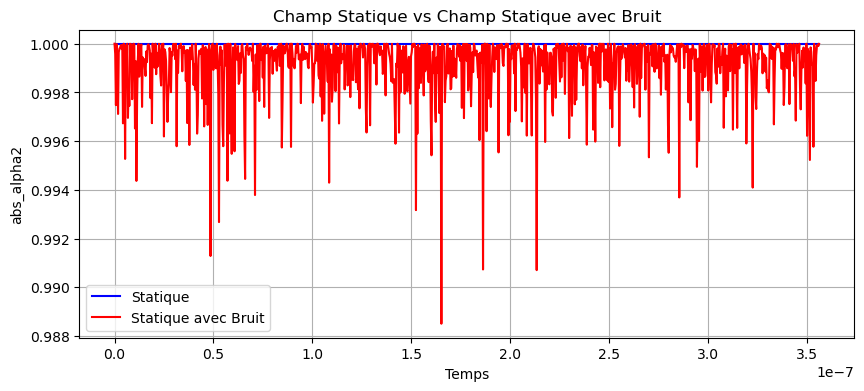

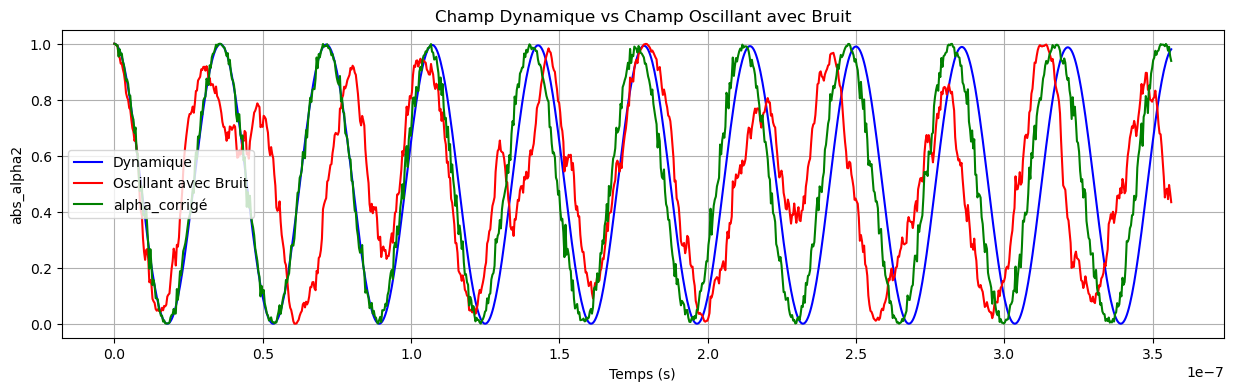

In [10]:
# Lire les fichiers statiques (sans nombres complexes)
donnees_statiques = np.loadtxt('data.csv', delimiter=' ', skiprows=1)
donnees_avec_bruit = np.loadtxt('simulation_bruit_qubit.csv', delimiter=' ', skiprows=1)

# Lire les fichiers dynamiques (avec nombres complexes)
donnees_dynamiques = np.loadtxt('dynamic_data.csv', delimiter=' ', skiprows=1)
donnees_oscillantes_avec_bruit = np.loadtxt('champ_magnetique_oscillant_avec_bruit_et_correction.csv', delimiter=' ', skiprows=1)

# Premier graphique : Champ Statique vs Champ Statique avec Bruit
plt.figure(figsize=(10, 4))
plt.plot(donnees_statiques[:, 0], donnees_statiques[:, -2], label='Statique', color='b')
plt.plot(donnees_avec_bruit[:, 0], donnees_avec_bruit[:, -2], label='Statique avec Bruit', color='r')
plt.xlabel('Temps')
plt.ylabel('abs_alpha2')
plt.title('Champ Statique vs Champ Statique avec Bruit')
plt.legend()
plt.grid(True)
plt.show()

# Deuxième graphique : Champ Dynamique vs Champ Oscillant avec Bruit
plt.figure(figsize=(15, 4))
plt.plot(donnees_dynamiques[:, 0], donnees_dynamiques[:, -2], label='Dynamique', color='b')
plt.plot(donnees_oscillantes_avec_bruit[:, 0], donnees_oscillantes_avec_bruit[:, 1], label='Oscillant avec Bruit', color='r')
plt.plot(donnees_oscillantes_avec_bruit[:, 0], donnees_oscillantes_avec_bruit[:, 3], label='alpha_corrigé', color='g')
plt.xlabel('Temps (s)')
plt.ylabel('abs_alpha2')
plt.title('Champ Dynamique vs Champ Oscillant avec Bruit')
plt.legend()
plt.grid(True)
plt.show()


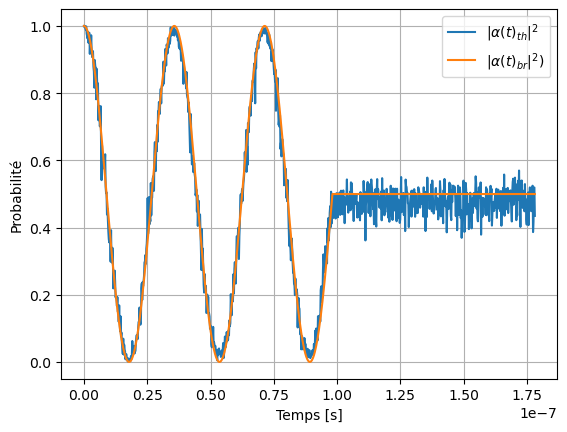

In [15]:
time = np.loadtxt("preparation_qubit_champ_dynamique_bruit_correction.csv", delimiter=" ", skiprows=1, usecols=0)
#theta = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=1)
#phi = np.loadtxt("dynamic_data.csv", delimiter=" ", skiprows=1, usecols=2)

P1 = np.loadtxt("preparation_qubit_champ_dynamique_bruit_correction.csv", delimiter=" ", skiprows=1, usecols=3)  # Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("preparation_qubit_champ_dynamique_bruit_correction.csv", delimiter=" ", skiprows=1, usecols=4)  # Colonne probab de |1> , abs(beta)

P11 = np.loadtxt("preparation_qubit.csv", delimiter=" ", skiprows=1, usecols=3)  # Colonne proba de |0> , abs(alpha)
P22 = np.loadtxt("preparation_qubit.csv", delimiter=" ", skiprows=1, usecols=4)  # Colonne probab de |1> , abs(beta)

plt.plot(time , P1 , label=r'$|{\alpha}(t)_{th}|^2$' )
plt.plot(time , P11 , label=r'$|{\alpha}(t)_{br}|^2$)')
plt.xlabel("Temps [s]")
plt.ylabel("Probabilité")
plt.grid()
plt.legend()
plt.show()

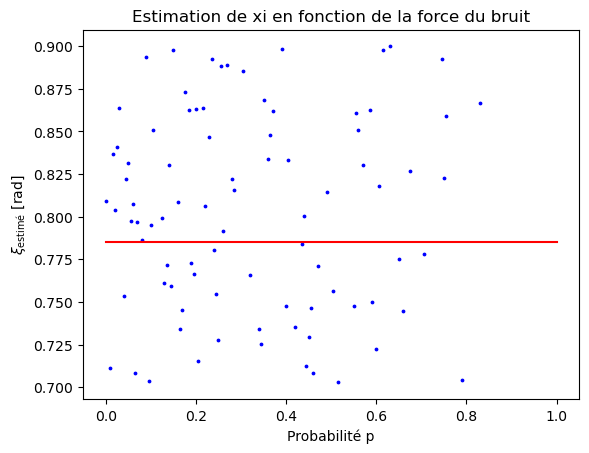

valeur théorique xi : 0.785 rad
valeur moyenne de nos valeurs estimées xi: 0.803 rad
écart relatif entre la valeur théorique et la valeur moyenne estimée : 2.184 %




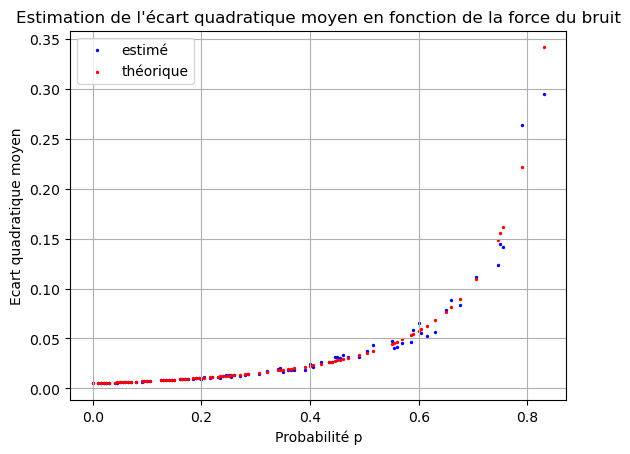

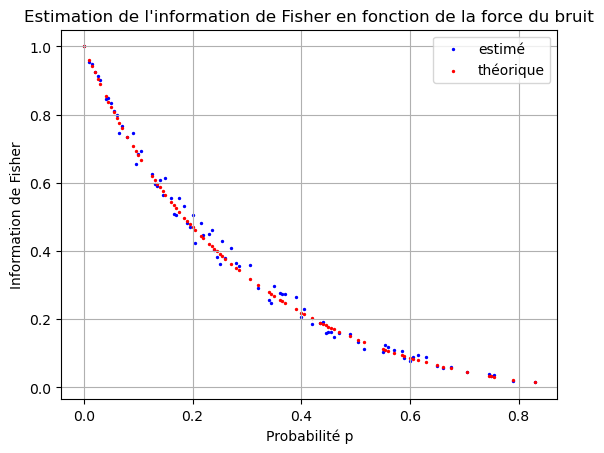

In [12]:
#importation fichier estimation.csv relatif aux données du qubit simple
qub = np.loadtxt("estimation_single.csv", delimiter=",", skiprows=1)

#extraction des colonnes pour le qubit simple
p = qub[:,0]              #proba p
estimation = qub[:,2]     #valeur estimée xi
xi_exact = qub[:,3]       #valeur exacte xi
ECM = qub[:,4]            #écart quadratique moyen avec xi_mesuré    
ECM_exact = qub[:,5]      #écart quadratique moyen avec xi_exact
fisher = qub[:,6]         #information de Fisher avec xi_mesuré
fisher_exact = qub[:,7]   #information de Fisher avec xi_exact

# Calcul des quartiles 25% (Q1) et 75% (Q3) de la colonne 'estimation' pour ne pas considérer les valeurs aberrantes
Q1 = np.percentile(estimation, 25)
Q3 = np.percentile(estimation, 75)

# Filtrer les valeurs de estimation entre Q1 et Q3 et garder les valeurs de p associées
mask = (estimation >= Q1) & (estimation <= Q3)
p = p[mask]
estimation = estimation[mask]
ECM = ECM[mask]
ECM_exact = ECM_exact[mask]
xi_exact = xi_exact[mask]
fisher = fisher[mask]
fisher_exact = fisher_exact[mask]

#affichage de l'estimation de xi_estimé en fonction de la force du bruit
plt.scatter(p,estimation, s=3, c='b')
plt.plot([0,1],[np.pi/4,np.pi/4],c='r')
plt.xlabel("Probabilité p")
plt.ylabel(r"$\xi_{\mathrm{estimé}}$ [rad]")
plt.title("Estimation de xi en fonction de la force du bruit")
plt.show()
print("valeur théorique xi :",round(xi_exact[0],3),"rad" )
print("valeur moyenne de nos valeurs estimées xi:", round(np.mean(estimation),3),"rad")
print("écart relatif entre la valeur théorique et la valeur moyenne estimée :",round((np.mean(estimation)-np.pi/4)/(np.pi/4)*100,3),"%")
print("\n")


#affichage de l'écart quadratique moyen en fonction de la force du bruit sur les valeurs estimées vs théoriques
plt.scatter(p, ECM, s=2, c='b', label = 'estimé')
plt.scatter(p , ECM_exact, s=2, c='r', label = 'théorique')
plt.xlabel("Probabilité p")
plt.ylabel("Ecart quadratique moyen")
plt.title("Estimation de l'écart quadratique moyen en fonction de la force du bruit")
plt.legend()
plt.grid()
plt.show()
print("\n")


#affichage de l'information de Fisher en fonction de la force du bruit sur les valeurs estimées vs théoriques
plt.scatter(p , fisher, s=2,c='b', label = 'estimé' )
plt.scatter(p, fisher_exact, s=2, c='r', label = 'théorique')
plt.xlabel("Probabilité p")
plt.ylabel("Information de Fisher")
plt.title("Estimation de l'information de Fisher en fonction de la force du bruit")
plt.legend()
plt.grid()
plt.show()

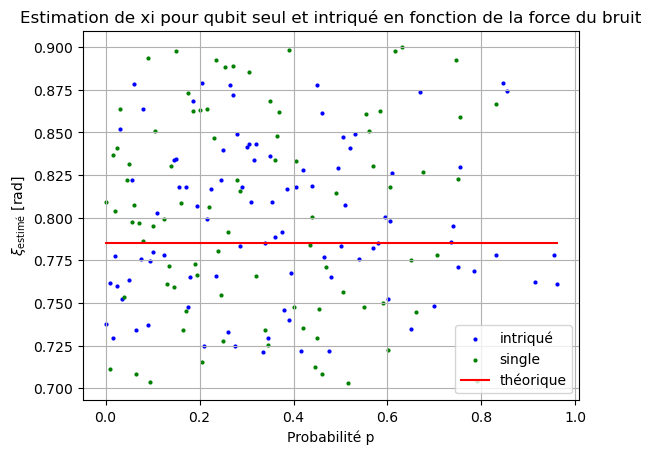

valeur théorique : 0.785
valeur moyenne de nos valeurs estimées qubit simple : 0.803
valeur moyenne de nos valeurs estimées qubit intriqué: 0.798
écart relatif entre la valeur théorique et la valeur moyenne estimée qubit simple: 2.184 %
écart relatif entre la valeur théorique et la valeur moyenne estimée qubit intriqué: 1.559 %




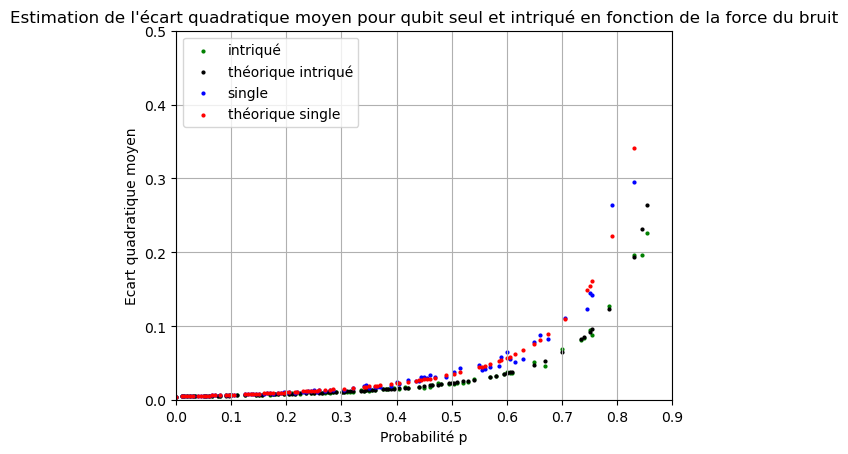

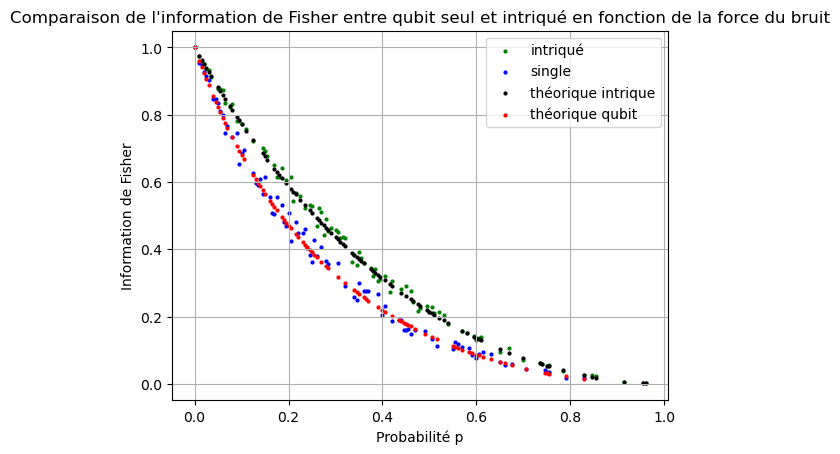

In [13]:
#importation fichier estimation_intrique relatif aux données du qubit intriqué 
data_int = np.loadtxt("estimation_intrique.csv", delimiter=" ", skiprows=1)

#extraction des colonnes pour le cas intriqué
p_int = data_int[:,0]
estimation_int = data_int[:,5]
xi_exact_int = data_int[:,6]
ECM_int = data_int[:,7]
ECM_exact_int = data_int[:,8]
fisher_int = data_int[:,9]
fisher_exact_int = data_int[:,10]

# Calcul des quartiles 25% (Q1) et 75% (Q3) de la colonne 'estimation' pour ne pas considérer les valeurs aberrantes
Q1 = np.percentile(estimation_int, 25)
Q3 = np.percentile(estimation_int, 75)

# Filtrer les valeurs de estimation entre Q1 et Q3 et garder les valeurs de p associées
mask = (estimation_int >= Q1) & (estimation_int <= Q3)
p_int = p_int[mask]
estimation_int = estimation_int[mask]
ECM_int = ECM_int[mask]
ECM_exact_int = ECM_exact_int[mask]
xi_exact_int = xi_exact_int[mask]
fisher_int = fisher_int[mask]
fisher_exact_int = fisher_exact_int[mask]


#affichage de l'estimation de xi_estimé qubit seul VS intriqué en fonction de la force du bruit
plt.scatter(p_int , estimation_int, s=4, label = "intriqué", c='b')
plt.scatter(p, estimation, s=4, c='g', label = 'single')
plt.plot(p_int,xi_exact_int, label = "théorique", c='r')
plt.xlabel("Probabilité p")
plt.ylabel(r"$\xi_{\mathrm{estimé}}$ [rad]")
plt.title("Estimation de xi pour qubit seul et intriqué en fonction de la force du bruit")
plt.legend()
plt.grid()
plt.show()

print("valeur théorique :",round(xi_exact[0],3))
print("valeur moyenne de nos valeurs estimées qubit simple :", round(np.mean(estimation),3))
print("valeur moyenne de nos valeurs estimées qubit intriqué:", round(np.mean(estimation_int),3))
print("écart relatif entre la valeur théorique et la valeur moyenne estimée qubit simple:",abs(round((np.mean(estimation)-np.pi/4)/(np.pi/4)*100,3)),"%")
print("écart relatif entre la valeur théorique et la valeur moyenne estimée qubit intriqué:",abs(round((np.mean(estimation_int)-np.pi/4)/(np.pi/4)*100,3)),"%")
print("\n")


#affichage de l'écart quadratique moyen qubit seul VS intriqué en fonction de la force du bruit 
#sur les valeurs estimées vs théoriques 
plt.scatter(p_int , ECM_int, s=4, label = "intriqué", c='g')
plt.scatter(p_int, ECM_exact_int, s=4, label = "théorique intriqué", c='black')
plt.scatter(p , ECM, s=4, label = "single", c='b')
plt.scatter(p, ECM_exact, s=4, label = "théorique single", c='r')
plt.xlabel("Probabilité p")
plt.ylabel("Ecart quadratique moyen")
plt.title("Estimation de l'écart quadratique moyen pour qubit seul et intriqué en fonction de la force du bruit")
plt.ylim([0,0.5])
plt.xlim([0,0.9])
plt.legend(loc="upper left")
plt.grid()
plt.show()
print("\n")

#affichage de l'information de Fisher qubit seul VS intrique en fonction de la force du bruit
#sur les valeurs estimées vs théoriques
plt.scatter(p_int , fisher_int, s=4, label = "intriqué", c='g')
plt.scatter(p,fisher,s=4,label = 'single', c='b')
plt.scatter(p_int, fisher_exact_int, s=4, label = "théorique intrique", c='black')
plt.scatter(p, fisher_exact, s=4, label = "théorique qubit", c='r')
plt.xlabel("Probabilité p")
plt.ylabel("Information de Fisher")
plt.title("Comparaison de l'information de Fisher entre qubit seul et intriqué en fonction de la force du bruit")
plt.legend()
plt.grid()
plt.show()



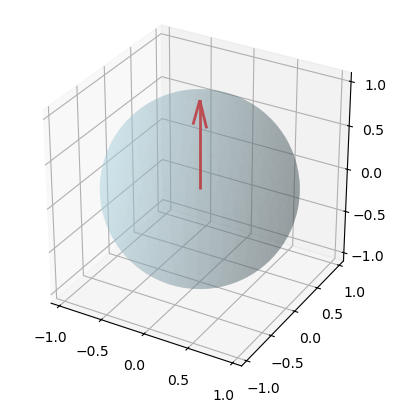

MovieWriter ffmpeg unavailable; using Pillow instead.


In [14]:
# Charger les données de simulation (assure-toi que ces arrays sont disponibles)
time = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=0)
theta = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=1)
phi = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=2)
P1 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=3)# Colonne proba de |0> , abs(alpha)
P2 = np.loadtxt("data.csv", delimiter=" ", skiprows=1, usecols=4)# Colonne probab de |1> , abs(beta)

n_frames = len(time)  # Nombre de pas de temps

# Conversion sphériques -> cartésiennes
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Préparation de la figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlim([-1.1, 1.1])
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])
ax.set_box_aspect([1, 1, 1])

# Ajout d'une sphère pour guider l'animation
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones_like(u), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='lightblue', alpha=0.3)

# Initialisation de la flèche (vecteur)
arrow = ax.quiver(0, 0, 0, x[0], y[0], z[0], color='red', linewidth=2)

# Fonction de mise à jour de l'animation
def update(frame):
    arrow.set_segments([[[0, 0, 0], [x[frame], y[frame], z[frame]]]])
    return arrow,

# Création de l'animation
anim = FuncAnimation(fig, update, frames=n_frames, interval=50, blit=False)

# Affichage
plt.show()

# Sauvegarde de l'animation
anim.save("precession_arrow.gif", writer="ffmpeg", fps=60)